# Лабораторная работа 2

## Оценки математического ожидания, дисперсии, медианы

Пусть СВ $\xi$ имеет распределение, задаваемое плотностью $f_{\xi}(x) = \theta^2xe^{-\theta x}$. Для каждого $\theta \in \left\lbrace 0.5, 2, 8 \right\rbrace$:

1. Аналитически вычислить математическое ожидание, дисперсию и математическое ожидание квадрата $\xi$.

**Решение:**

Плотность $f_\xi(x)$ определена при $x > 0$.

$$
E\xi = \int_{0}^{+\infty}f_\xi x dx
$$

$$
E\xi^2 = \int_{0}^{+\infty}f_\xi x^2 dx
$$

$$
D\xi = E\xi^2 - (E\xi) ^ 2
$$

Найдем первообразные для $E\xi, E\xi^2$

1. $E\xi = \int_{0}^{+infty}\theta^2x^2e^{-\theta x} dx = \theta^2 \int_0^{+\infty} x^2 e^{-\theta x}dx = \left| \int_0^{+\infty} x^{n} e^{-a x}\,dx = \frac{n!}{a^{n+1}}, \quad a > 0,\ n \in \mathbb{N}\right| = \left|n = 2, a = \theta \right| = \theta^2 \cdot \frac{2}{\theta^3} = \frac{2}{\theta}$
2. $E\xi^2 = \int_{}^{}\theta^2x^3e^{-\theta x} dx = \theta^2 \int_0^{+\infty} x^3 e^{-\theta x} dx = \left|n = 3, a = \theta \right| = \theta^2 \cdot \frac{3!}{\theta^4} = \frac{6}{\theta^2}$
3. $D\xi = E\xi^2 - (E\xi) ^ 2 = \frac{6}{\theta^2} - (\frac{2}{\theta})^2 = \frac{2}{\theta^2}$

2. Для $k \in \left\lbrace 2^4, 2^5, \cdots, 2^{15} \right\rbrace$ построить выборку из $k$ элементов. Для каждой из них посчитать оценки: математического ожидания, дисперсии и квадрата математического ожидания параметра из варианта. Для каждой из выборок и оценок визуализировать это все
на графиках (для каждой оценки - свой график), где по вертикальной оси - оценка, а по горизонтальной - $k$, плюс, добавьте горизонтальную линию, отвечающую за аналитически полученную оценку.

In [4]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

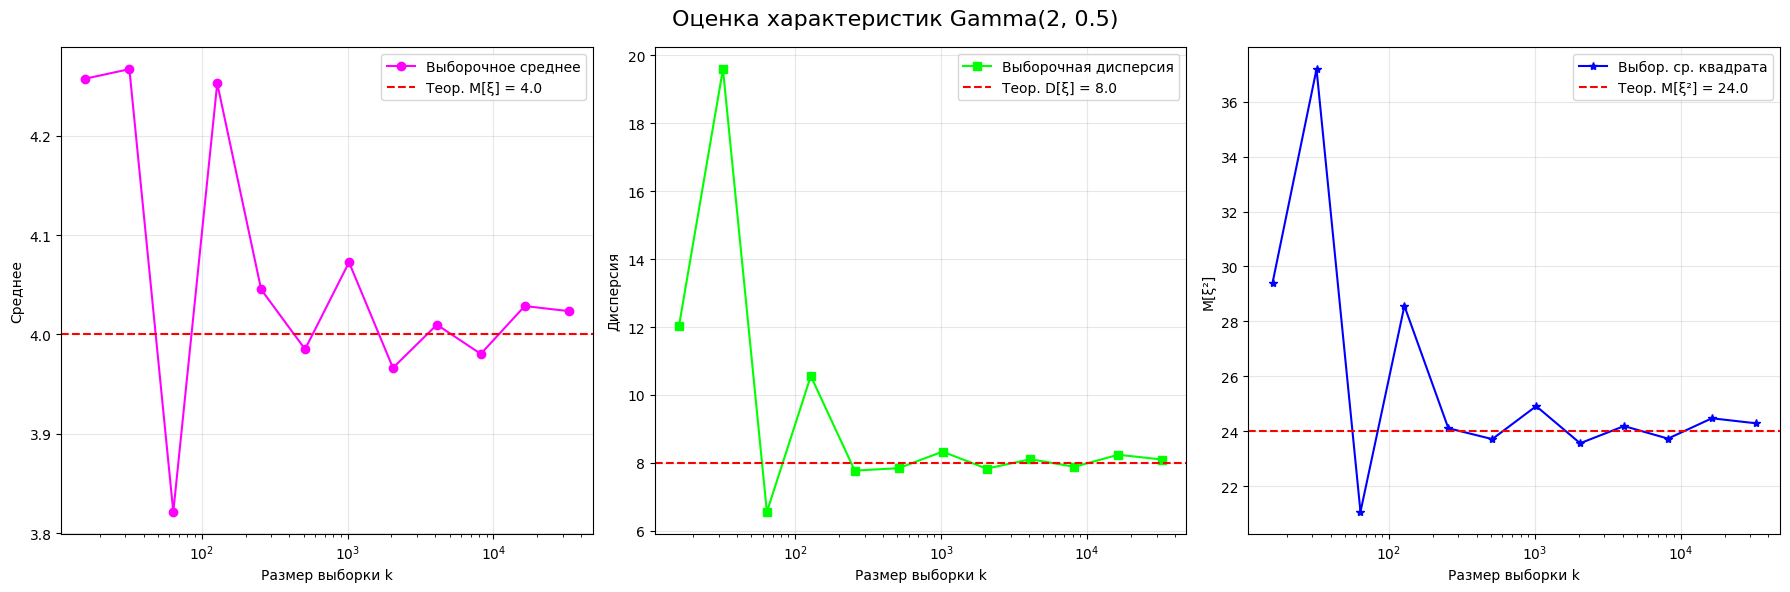

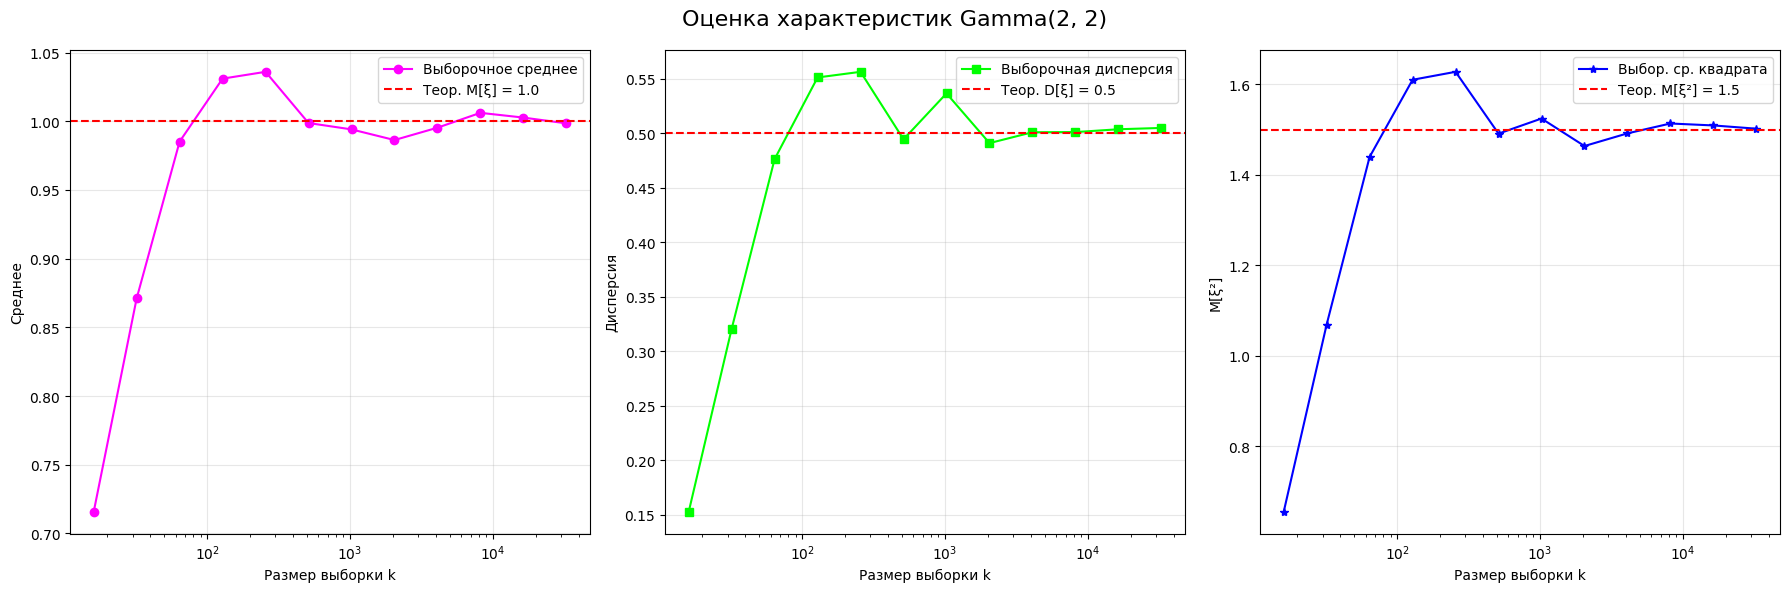

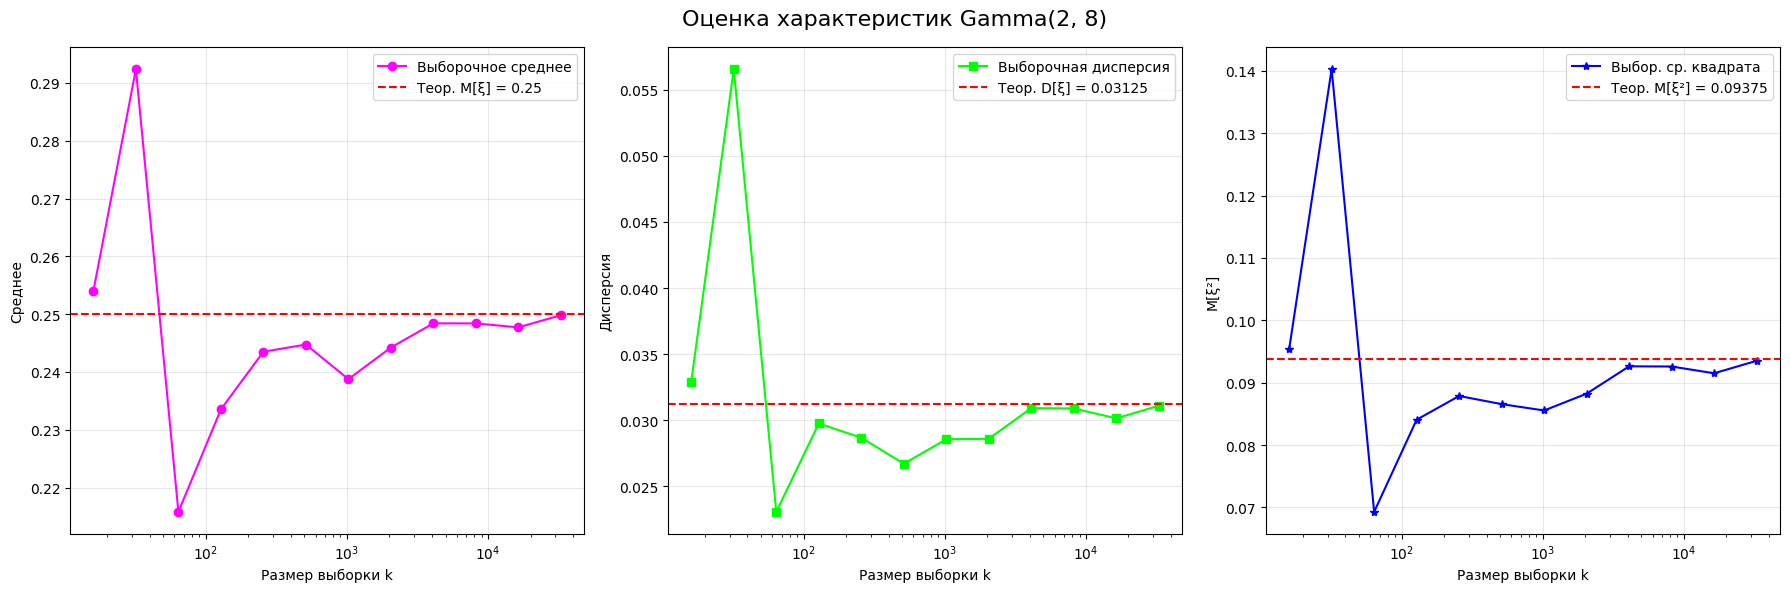

In [19]:
thetas = [0.5, 2, 8]
ks = [2 ** i for i in range(4, 16)]

for theta in thetas:
    
    true_mean = 2 / theta
    true_var = 2 / (theta ** 2)
    true_mean2 = true_var + true_mean ** 2

    mean = []
    var = []
    mean2 = []
    
    for k in ks:
        sample = stats.gamma.rvs(a = 2, scale = 1 / theta, size = k)
        mean.append(sample.mean())
        var.append(sample.var(ddof = 1))
        mean2.append((sample ** 2).mean())
    
    fig, axes = plt.subplots(1, 3, figsize = (18, 6))
    fig.suptitle(f'Оценка характеристик Gamma(2, {theta})', fontsize=16)

    axes[0].plot(ks, mean, 'o-', label = 'Выборочное среднее', color = 'magenta')
    axes[0].axhline(true_mean, color = 'red', linestyle = '--', label = f'Теор. M[ξ] = {true_mean}')
    axes[0].set_xscale('log')
    axes[0].set_xlabel('Размер выборки k')
    axes[0].set_ylabel('Среднее')
    axes[0].legend()
    axes[0].grid(True, alpha = 0.3)

    axes[1].plot(ks, var, 's-', label ='Выборочная дисперсия', color ='lime')
    axes[1].axhline(true_var, color ='red', linestyle ='--', label =f'Теор. D[ξ] = {true_var}')
    axes[1].set_xscale('log')
    axes[1].set_xlabel('Размер выборки k')
    axes[1].set_ylabel('Дисперсия')
    axes[1].legend()
    axes[1].grid(True, alpha =0.3)

    axes[2].plot(ks, mean2, '*-', label ='Выбор. ср. квадрата', color ='blue')
    axes[2].axhline(true_mean2, color ='red', linestyle ='--', label =f'Теор. M[ξ²] = {true_mean2}')
    axes[2].set_xscale('log')
    axes[2].set_xlabel('Размер выборки k')
    axes[2].set_ylabel('M[ξ²]')
    axes[2].legend()
    axes[2].grid(True, alpha =0.3)

    # Общая настройка
    plt.tight_layout()
    plt.show()
    

## Моделирование совместного распределения двух СВ